In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
emo = pd.read_pickle('data/emo_df.pkl')
data = pd.read_pickle('data/sent2.pkl')

In [3]:
emo.head()

emotion,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,3,22,2,3,11,14,22,4,6,13
1,14,23,8,15,21,24,37,12,17,18
2,7,26,5,12,26,17,42,9,13,31
3,6,14,4,7,6,14,30,7,2,20
4,17,30,15,13,23,29,43,14,15,24


In [4]:
emo['type'] = data['type'] 

In [5]:
emo_mean = emo.groupby(['type']).mean()

In [6]:
emo_mean.describe()

emotion,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,11.159245,25.972121,8.108211,13.654095,24.089006,26.575356,50.681313,13.186952,11.059427,31.434720
std,0.812385,1.794371,0.707675,1.081636,2.694807,1.778058,3.513639,1.009243,0.651260,2.050120
min,9.104167,20.187500,6.687500,10.375000,19.416667,21.937500,40.979167,10.416667,9.312500,24.958333
25%,10.893440,25.581506,7.595973,13.313540,21.920174,25.969902,49.380591,12.875916,10.680305,31.001411
50%,11.320923,26.069485,8.293507,13.711345,24.028260,26.760684,50.221243,13.205886,11.104261,31.876674
75%,11.741826,27.162093,8.624029,14.074188,26.173142,27.796900,53.005309,13.556257,11.660680,32.460549
max,12.190476,28.164626,9.191011,15.240175,28.452632,28.486354,55.878947,15.040393,11.857895,33.773684


In [7]:
stdz_emo = (emo_mean-emo_mean.mean())/emo_mean.std()
stdz_emo.reset_index(inplace=True)
stdz_emo.head()

emotion,type,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,ENFJ,0.017773,0.657897,-0.725579,-0.020816,1.619272,0.070101,1.479274,0.597004,1.226035,1.140891
1,ENFP,-0.232494,0.682644,0.269967,0.126675,1.467800,0.113844,1.097992,0.288896,0.918758,0.449884
2,ENTJ,1.269386,-0.153341,0.544453,0.251760,-0.910137,0.406817,-0.230867,-0.562703,0.108165,0.075130
3,ENTP,0.943274,-0.376606,0.820773,0.291455,-0.605636,1.072179,-0.145709,-0.120148,-0.248160,-0.121612
4,ESFJ,-1.221808,0.678988,-1.599633,-0.164477,1.018376,-1.247548,0.910634,-0.256014,-0.676195,0.055069


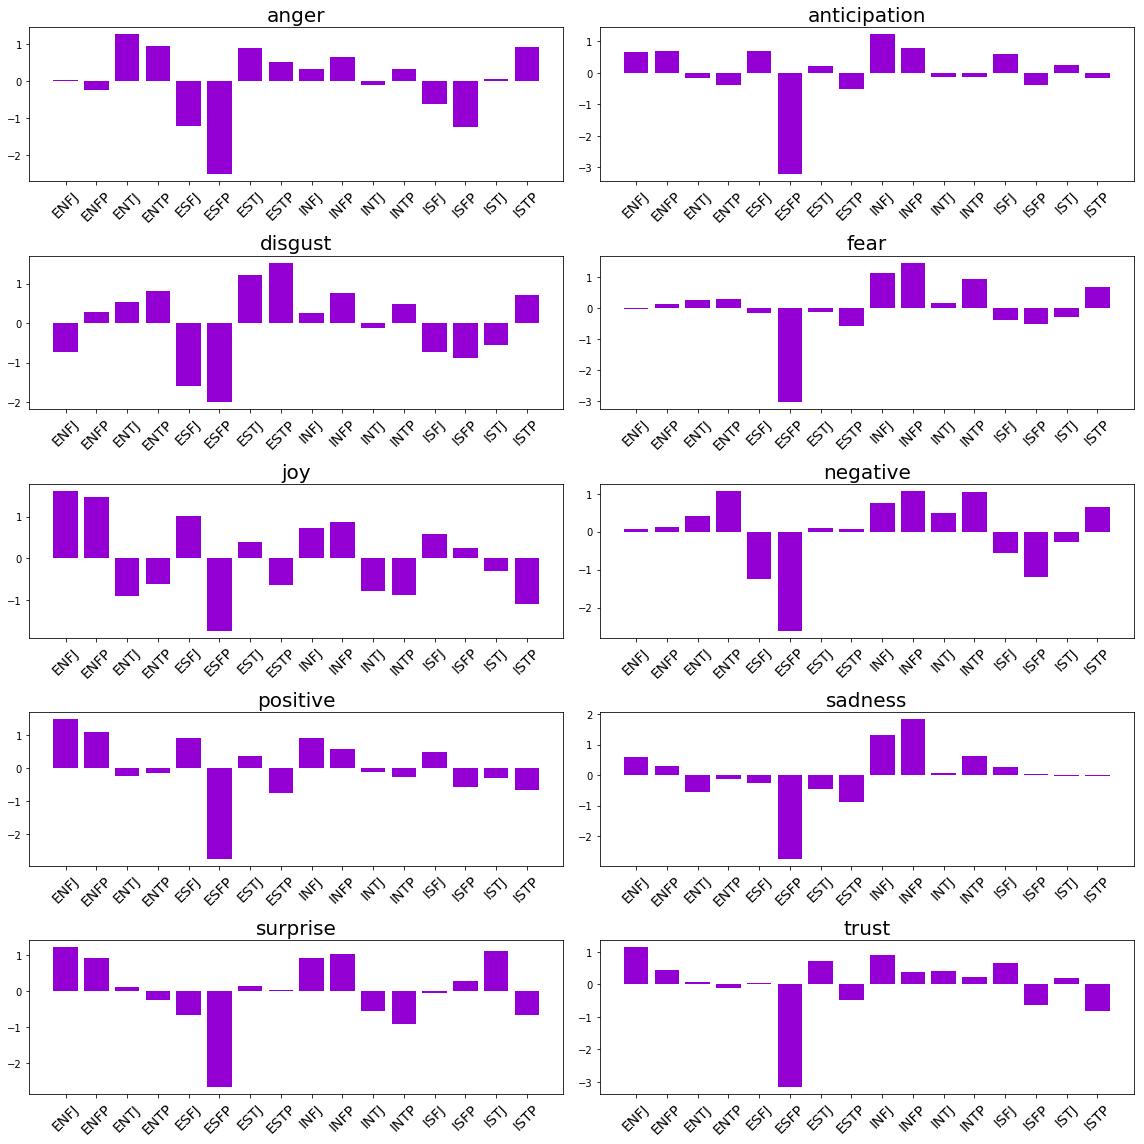

In [8]:
fig,axes = plt.subplots(5,2, figsize=(16, 16))
for e, ax in enumerate(axes.flatten()):
    ax.bar(x="type", height=stdz_emo.drop(['type'],axis=1).columns[e], 
                color="darkviolet", data=stdz_emo)
    ax.set_xticklabels(stdz_emo.type, rotation=45, fontsize=14)
    ax.set_title(stdz_emo.drop(['type'],axis=1).columns[e],{'fontsize': 20})

plt.tight_layout();

In [9]:
emo.groupby(['type']).mean()

emotion,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
type,,,,,,,,,,
ENFJ,11.173684,27.152632,7.594737,13.631579,28.452632,26.700000,55.878947,13.789474,11.857895,33.773684
ENFP,10.970370,27.197037,8.299259,13.791111,28.044444,26.777778,54.539259,13.478519,11.657778,32.357037
ENTJ,12.190476,25.696970,8.493506,13.926407,21.636364,27.298701,49.870130,12.619048,11.129870,31.588745
ENTP,11.925547,25.296350,8.689051,13.969343,22.456934,28.481752,50.169343,13.065693,10.897810,31.185401
ESFJ,10.166667,27.190476,6.976190,13.476190,26.833333,24.357143,53.880952,12.928571,10.619048,31.547619
ESFP,9.104167,20.187500,6.687500,10.375000,19.416667,21.937500,40.979167,10.416667,9.312500,24.958333
ESTJ,11.897436,26.384615,8.974359,13.538462,25.153846,26.743590,51.974359,12.717949,11.153846,32.923077
ESTP,11.584270,25.033708,9.191011,13.044944,22.348315,26.707865,48.056180,12.292135,11.078652,30.449438
INFJ,11.427211,28.164626,8.287755,14.881633,26.073469,27.935374,53.891156,14.528571,11.669388,33.285714


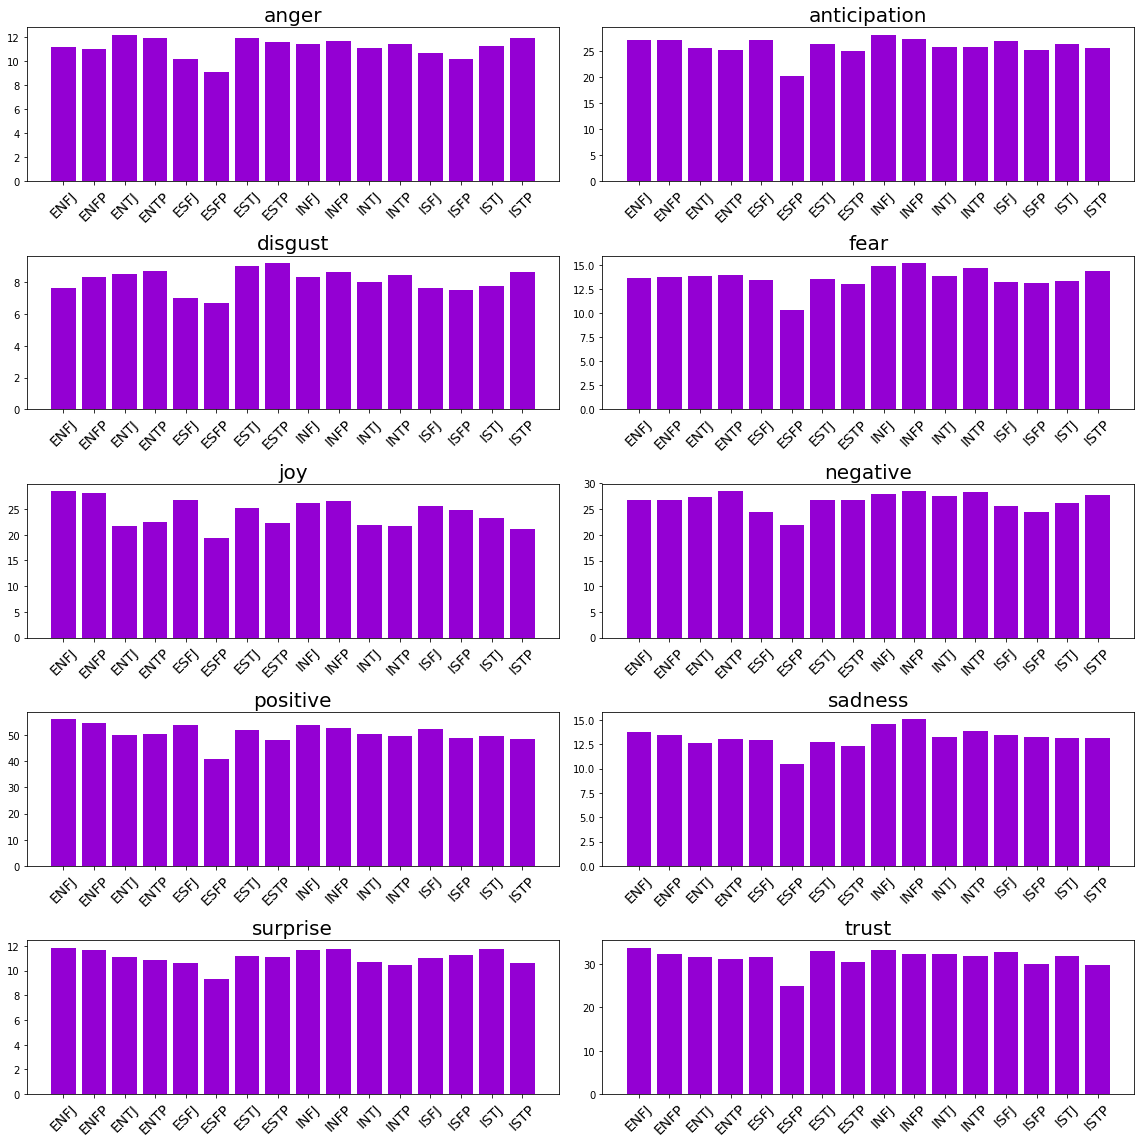

In [10]:
fig,axes = plt.subplots(5,2, figsize=(16, 16))
for e, ax in enumerate(axes.flatten()):
    ax.bar(x=emo_mean.index, height=emo_mean.columns[e], 
                color="darkviolet", data=emo_mean)
    ax.set_xticklabels(emo_mean.index, rotation=45, fontsize=14)
    ax.set_title(emo_mean.columns[e],{'fontsize': 20})

plt.tight_layout();

In [11]:
emo2 = emo.groupby(['type']).mean()/emo.groupby(['type']).std()

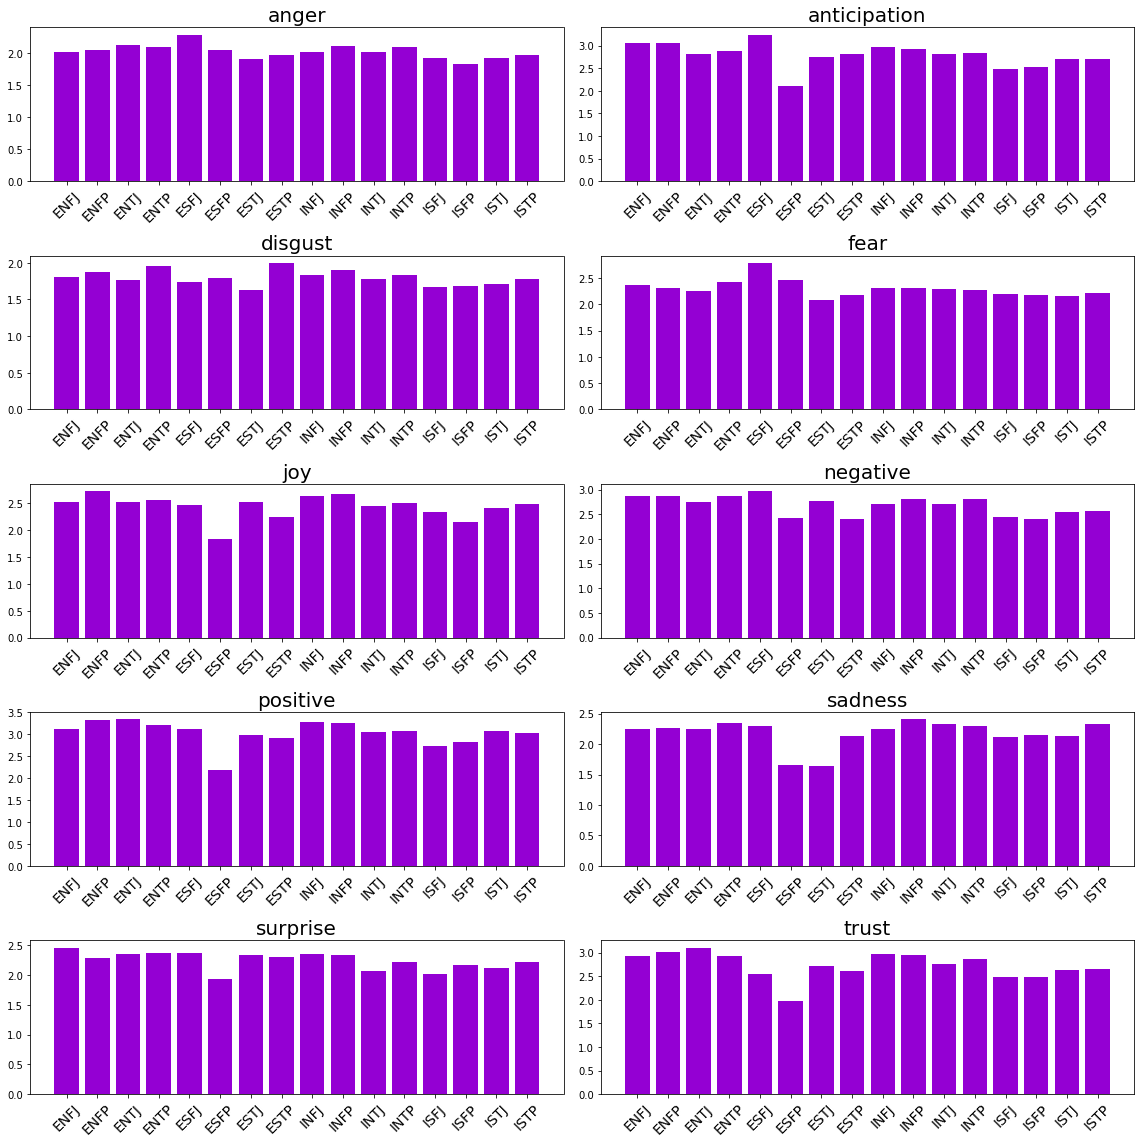

In [12]:
fig,axes = plt.subplots(5,2, figsize=(16, 16))
for e, ax in enumerate(axes.flatten()):
    ax.bar(x=emo2.index, height=emo2.columns[e], 
                color="darkviolet", data=emo2)
    ax.set_xticklabels(emo2.index, rotation=45, fontsize=14)
    ax.set_title(emo2.columns[e],{'fontsize': 20})

plt.tight_layout();

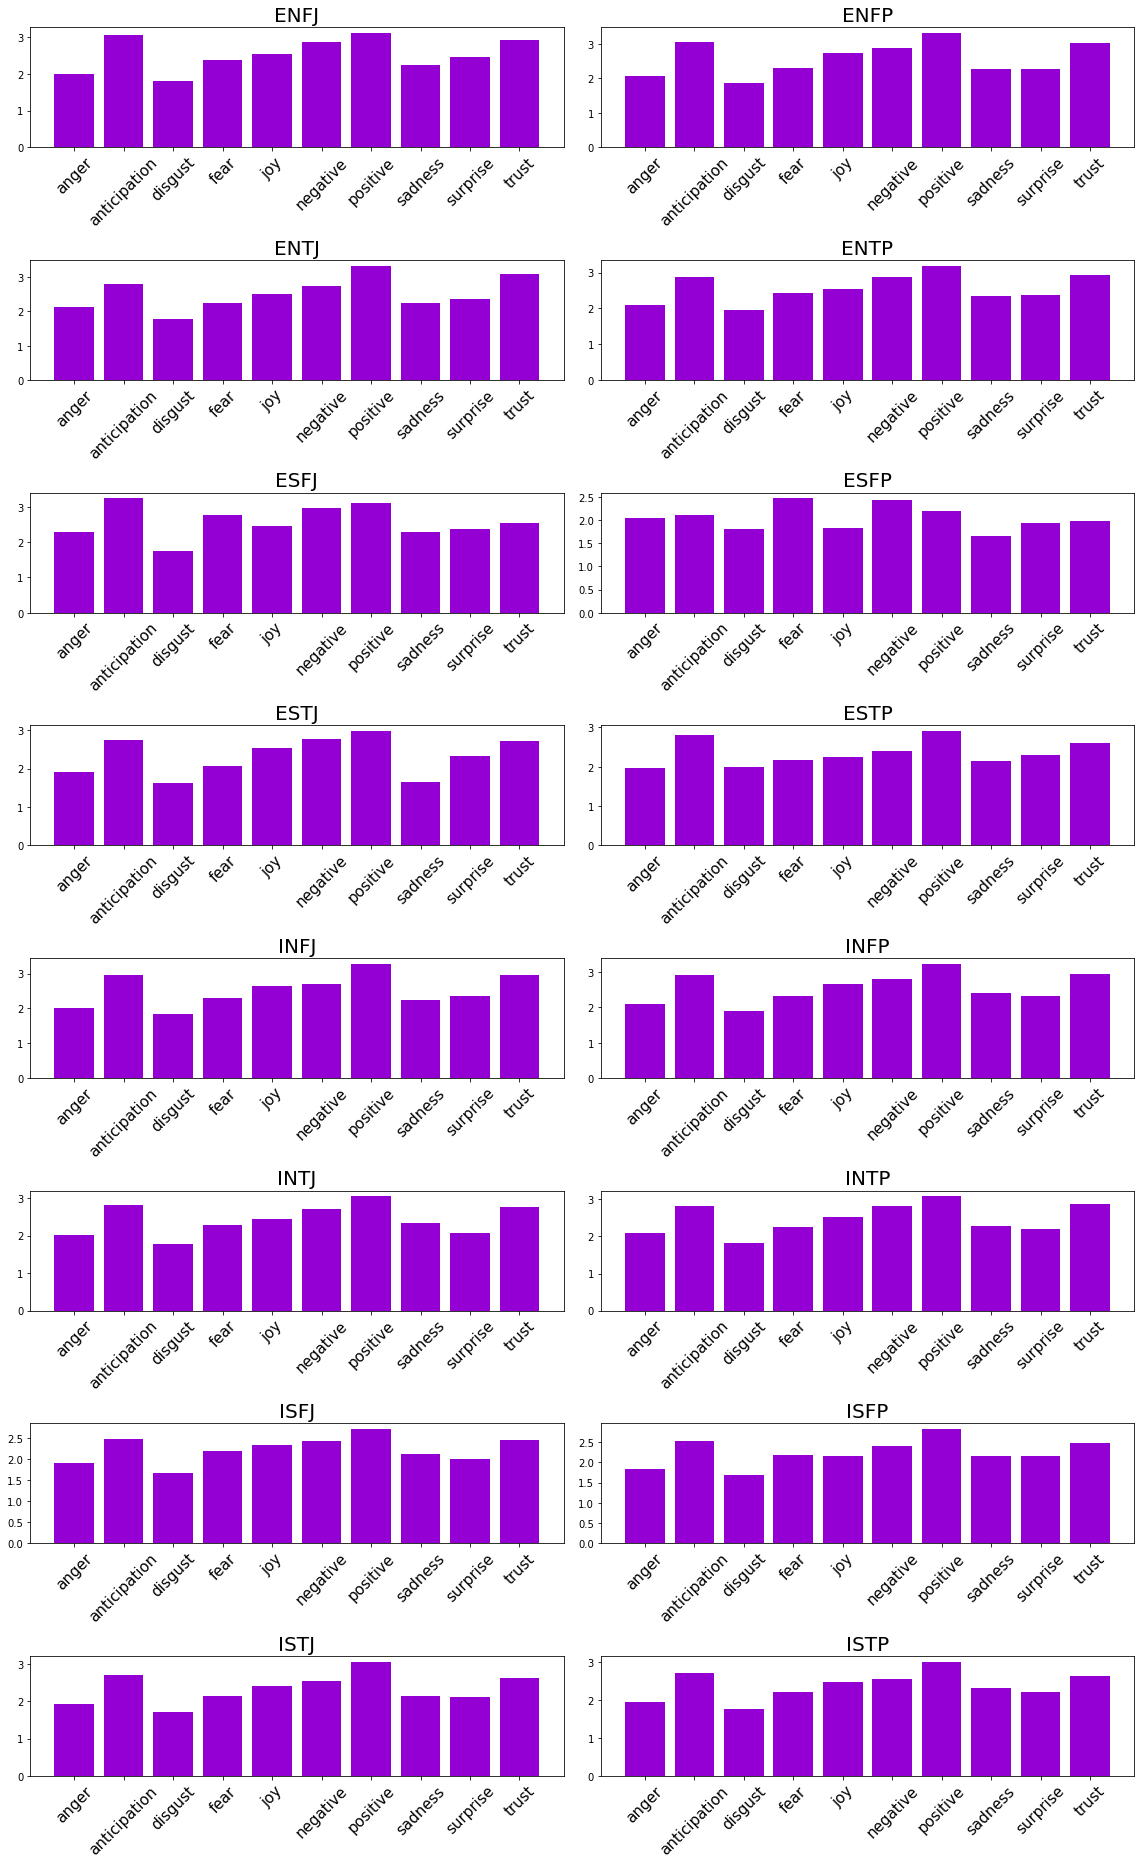

In [13]:
fig,axes = plt.subplots(8,2, figsize=(16, 26))
for e, ax in enumerate(axes.flatten()):
    ax.bar(x=emo2.T.index, height=emo2.T.columns[e], 
                color="darkviolet", data=emo2.T)
    ax.set_xticklabels(emo2.T.index, rotation=45, fontsize=15)
    ax.set_title(emo2.T.columns[e],{'fontsize': 20})

plt.tight_layout();
# fig.savefig('emotionsByPersonality.png')

In [14]:
from math import pi

In [15]:
radar = emo2.reset_index()

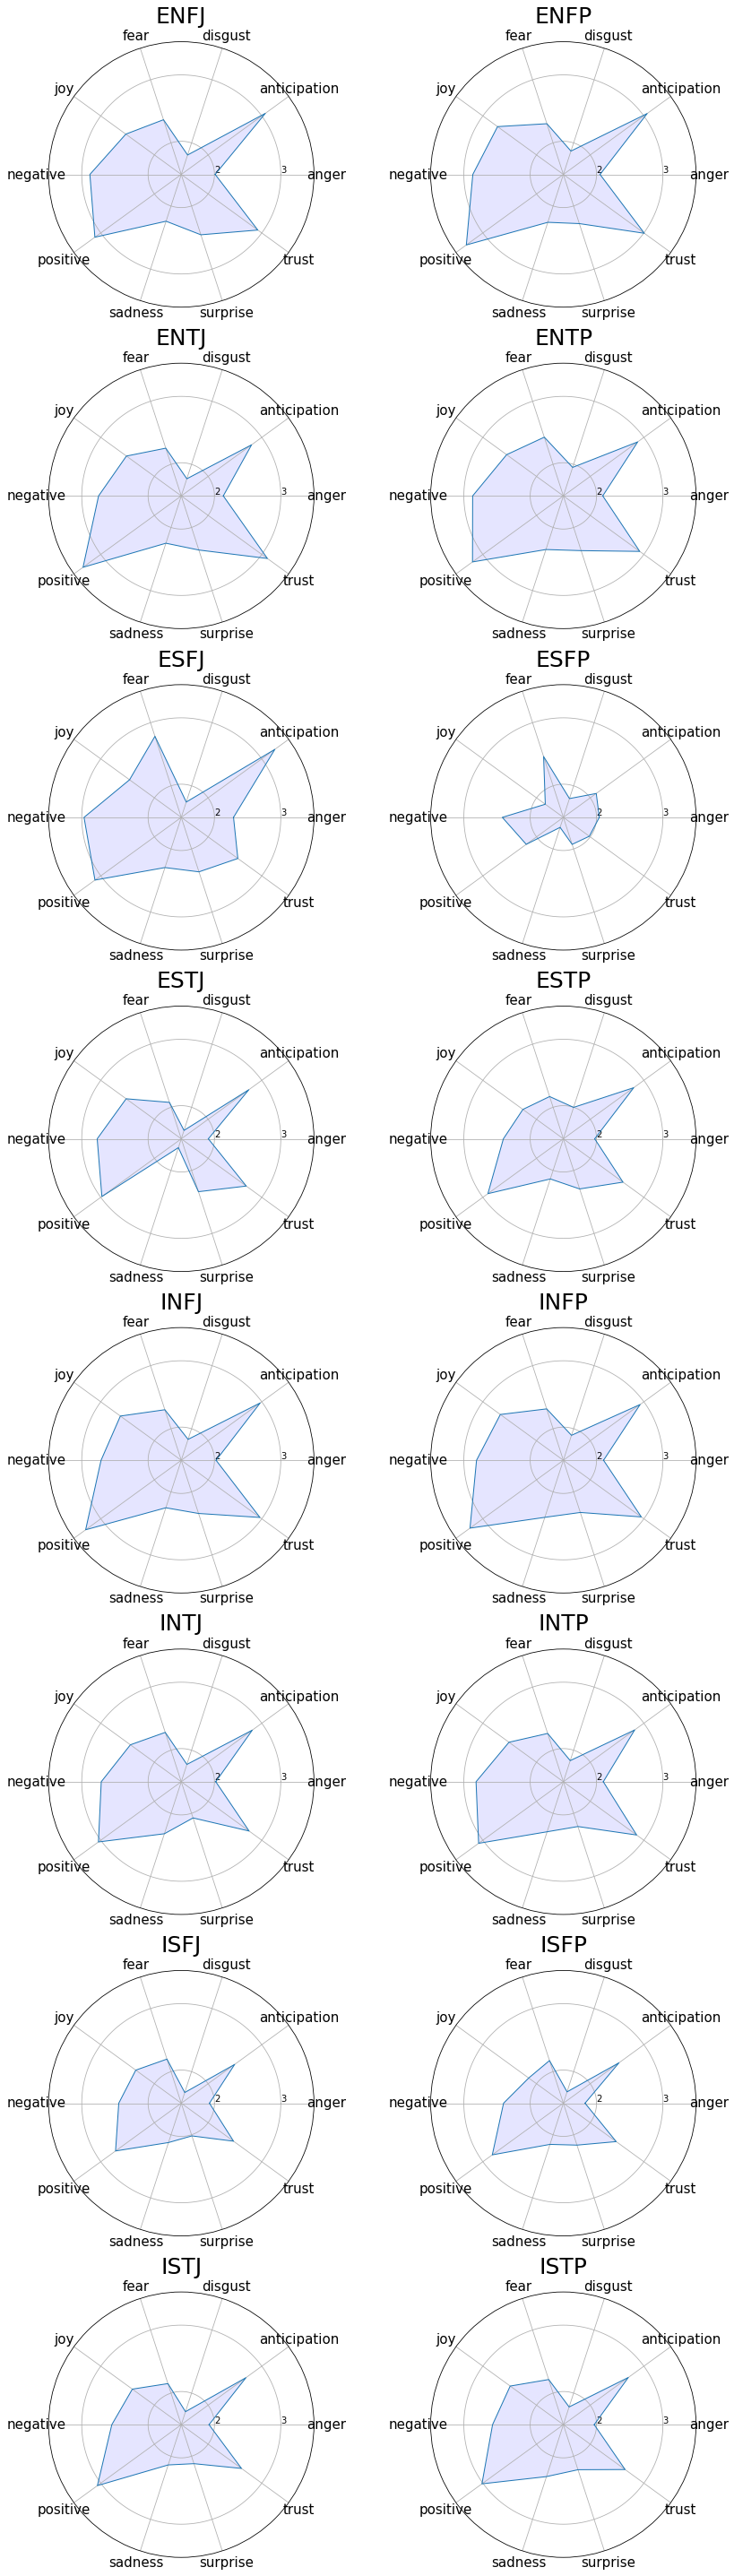

In [17]:
fig = plt.figure(figsize=(12, 40))
for e in range(len(radar)):    
    # number of variable
    categories=list(radar)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=radar.loc[e].drop('type').values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(8,2,e+1, polar=True)
    ax.set_title(radar.type[e],{'fontsize': 25})

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=15)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3], ["1","2","3"], color="black", size=10)
    plt.ylim(1.5,3.5)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'blue', alpha=0.1)
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('img/emo{}.png'.format(radar.type[e]), bbox_inches=extent.expanded(1.2, 1.3))
plt.tight_layout()
fig.savefig('img/emoByType.png')
